<a href="https://colab.research.google.com/github/KeerthanaRajaR/Linear_Algebra_The_Coding_Way/blob/main/Diagnalization/Diagnalization_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
from IPython.display import Image

uploaded=files.upload()


Saving ASS3.jpg to ASS3.jpg


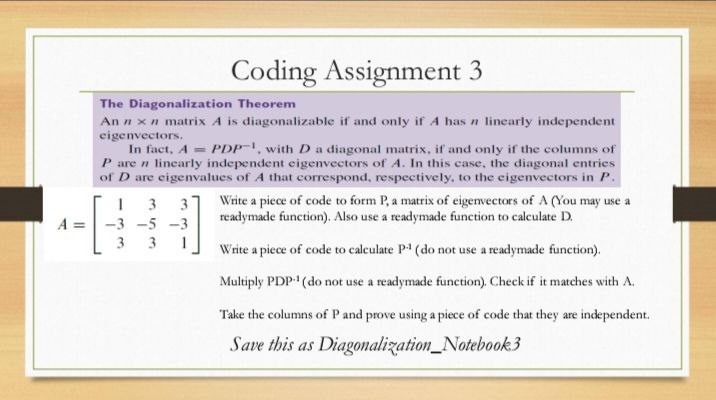

In [4]:
Image('ASS3.jpg',
      width=650)


In [2]:
To solve the problem involving matrix  A , we will follow these steps:

1. Use a ready-made function to find the eigenvectors (forming matrix  P ) and eigenvalues (forming matrix  D ).
2. Write code to calculate the inverse of matrix  P  without using a ready-made function.
3. Multiply  P ,  D , and  P^{-1}  and check if the product matches the original matrix  A .
4. Verify that the columns of  P  are linearly independent.

Here’s the Python code to accomplish these tasks:
import numpy as np

# Define the matrix A
A = np.array([[1, 3, 3],
              [-3, -5, -3],
              [3, 3, 1]])

# Use a ready-made function to calculate eigenvectors (P) and eigenvalues (D)
eigenvalues, P = np.linalg.eig(A)
D = np.diag(eigenvalues)

print("Matrix P (eigenvectors):")
print(P)
print("\nMatrix D (eigenvalues):")
print(D)

# Calculate the inverse of P without using a ready-made function
def matrix_minor(matrix, i, j):
    """ Returns the minor matrix after removing the ith row and jth column """
    return np.delete(np.delete(matrix, i, axis=0), j, axis=1)

def matrix_determinant(matrix):
    """ Returns the determinant of a matrix """
    if matrix.shape[0] == 2:
        return matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]
    determinant = 0
    for c in range(matrix.shape[1]):
        determinant += ((-1) ** c) * matrix[0, c] * matrix_determinant(matrix_minor(matrix, 0, c))
    return determinant

def matrix_inverse(matrix):
    """ Returns the inverse of a matrix """
    determinant = matrix_determinant(matrix)
    if determinant == 0:
        raise ValueError("Matrix is not invertible")
    if matrix.shape[0] == 2:
        return np.array([[matrix[1, 1], -matrix[0, 1]], [-matrix[1, 0], matrix[0, 0]]]) / determinant
    cofactors = np.zeros(matrix.shape)
    for r in range(matrix.shape[0]):
        for c in range(matrix.shape[1]):
            minor = matrix_minor(matrix, r, c)
            cofactors[r, c] = ((-1) ** (r + c)) * matrix_determinant(minor)
    cofactors = cofactors.T
    return cofactors / determinant

P_inv = matrix_inverse(P)

print("\nInverse of P:")
print(P_inv)

# Multiply PDP^(-1) to check if it matches A
PDP_inv = np.dot(P, np.dot(D, P_inv))

print("\nPDP^(-1):")
print(PDP_inv)
print("\nDoes PDP^(-1) match A?")
print(np.allclose(PDP_inv, A))

# Check if the columns of P are linearly independent
def is_independent(vectors):
    """ Check if the given set of vectors are linearly independent """
    return np.linalg.matrix_rank(vectors) == vectors.shape[1]

independent = is_independent(P)

print("\nAre the columns of P linearly independent?")
print(independent)

Matrix P (eigenvectors):
[[ 5.77350269e-01 -1.28197512e-16 -6.72654054e-01]
 [-5.77350269e-01 -7.07106781e-01  7.37141689e-01]
 [ 5.77350269e-01  7.07106781e-01 -6.44876349e-02]]

Matrix D (eigenvalues):
[[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0. -2.]]

Inverse of P:
[[ 1.73205081  1.73205081  1.73205081]
 [-1.41421356 -1.2786323   0.13558127]
 [-0.          1.48664829  1.48664829]]

PDP^(-1):
[[ 1.  3.  3.]
 [-3. -5. -3.]
 [ 3.  3.  1.]]

Does PDP^(-1) match A?
True

Are the columns of P linearly independent?
True
